In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
fname = '../../DataReduction/FullSes19SeptVSgr.obs.srl_20240920T002306.fit'

In [3]:
fits.getheader(fname)

SIMPLE  =                    T                                                  
BITPIX  =                  -32 / bits per data value                            
NAXIS   =                    1 / Number of data axes                            
NAXIS1  =               135378 / Length of data axis 1                          
EXPTIME =                  600 / [s] Total observation duration                 
DATE-OBS= '2024-09-20T00:18:06.898' / Date of observation start                 
BSCALE  =                    1 / linear factor in scaling equation              
BZERO   =                    0 / zero point in scaling equation                 
EXPOSURE=                  600 / [s] Total time of exposure                     
EXPTIME2= '1 x 600 s' / Exposure decomposition                                  
JD-OBS  =         2460573.5126 / JD start observation                           
JD-MID  =   2460573.5161000001 / JD mid observation                             
CRPIX1  =                   

In [4]:
b = fits.getval(fname,"CRVAL1")
m = fits.getval(fname,"CDELT1")

In [5]:
y = fits.getdata(fname)

In [6]:
x = m*np.arange(len(y))+b

(0.0, 5.0)

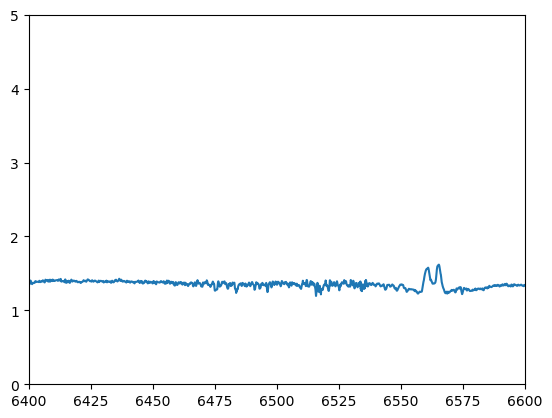

In [7]:
plt.plot(x,y)

plt.xlim(6400,6600)
plt.ylim(0,5)